In [1]:
# imports
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import utils
from keras.layers.convolutional import Conv2D
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_images = train_images / 255.0
test_images = test_images / 255.0

numclass = 10
train_labels = keras.utils.to_categorical(train_labels, numclass)
test_labels = keras.utils.to_categorical(test_labels, numclass)

170500096/170498071 [==============================] - 4s 0us/step


# General Concepts

Artificial intelligance is the ability for a computer to demonstrate intelligance close to humans. Some common examples would be image classification or decision making. Symbolic artificial intelligance is where the input and rules are applied and the result is the output. An example is like the drawing below.


```
          +----------+
input --> |          |
          |          | --> output
rules --> |          |
          +----------+
```



Artificial intelligance is a broader term used to describe different branches such as machine learning. Machine learning is a subset of artificial intelligance with several different categories. Two of the categories are supervised and unsupervised learning.

Supervised learning is where the model is provided with labeled training data and fed features and patterns into the algorithm where the model is trained. A label is the thing that is being predicted.

Unsupervised learning on the other hand learns from unlabeled data and the goal is for the machine to identify meaningful patterns in the data provided.

Instead of using the input and rules to come to the output, machine learning uses the input and the output to come up with the rules to try and predict future outputs. A drawing example is found below.

```
          +----------+
input --> |          |
          |          | --> rules
output--> |          |
          +----------+
```

Deep learning is a subsection of machine learning that involves the use of deep neural networks. The deep neural networks is when the inputs are passed among hidden layers until they are eventually output from the final layer.

# Building a Model

Convolutional neural networks were a breakthrough in building models for image classification where they take the raw pixel data as the input and learns to find the features instead of features being passed as the input themselves.

An example of a convolutional neural network can be seen in the picture below.

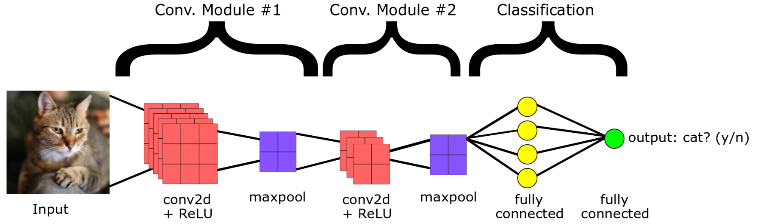

A convolution takes the tiles of the input and then applies filters to compute new features that produces an output map. During a convolution, the filters move from pixel to pixel taking the corresponding tiles. You could also add padding to the input to change the size of the matrix.

In the picture above, ReLU transforms the convolved feature by introducing nonlinearity to the model. After ReLU is the pooling step. In the pooling step, the convolutional neural network reduces the number of dimensions of the feature map but still keeps the critical information. Max pooling is one of the most popular pooling techniques.

At the end of the network is the fully connected layers which performs the classification based on the features from the convolutions. Typically the fully connected layers use a softmax activation function which outputs a value from 0 to 1 which is the probability value for the labels that are trying to be predicted.

A code example of building a convolutional neural network can be found below.

In [3]:
# set up the layers
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Comping a Model

When compiling the model, you have to choose which optimizer you want to use which determines how the network is trained.

You also have to choose a learning rate with the optimizer which controls how the weights are changed during the backpropagation. Different learning rates can cause the weights to change too much or not enough to find an useful answer.

When compiling the model, you also have to choose which loss function you want to use. The loss function is used to adjust the gradient descent during the training of the network.

A code example of compiling the network created above can be found below.

In [4]:
# compile the model
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Training a Model

Training the model requires constant tweaking to find the best result. Models can end up being underfitted, overfitted, or pretty good.

Underfitting is when the trend of the data is failed to be caught. The model fails to generalize new data and normally has poor performance with the training data.

Underfitting is easier to correct and detect than overfitting which results in it not being a huge deal compared to overfitting.

An example of an underfit model can be found below.




Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 16s 311us/step - loss: 0.3104 - acc: 0.8998 - val_loss: 0.2904 - val_acc: 0.9000
Epoch 2/20
50000/50000 [==============================] - 8s 158us/step - loss: 0.2909 - acc: 0.8997 - val_loss: 0.2809 - val_acc: 0.9000
Epoch 3/20
50000/50000 [==============================] - 8s 159us/step - loss: 0.2834 - acc: 0.8998 - val_loss: 0.2730 - val_acc: 0.9008
Epoch 4/20
50000/50000 [==============================] - 8s 155us/step - loss: 0.2787 - acc: 0.9001 - val_loss: 0.2752 - val_acc: 0.9007
Epoch 5/20
50000/50000 [==============================] - 8s 154us/step - loss: 0.2743 - acc: 0.9010 - val_loss: 0.2777 - val_acc: 0.9012
Epoch 6/20
50000/50000 [==============================] - 8s 154us/step - loss: 0.2705 - acc: 0.9016 - val_loss: 0.2658 - val_acc: 0.9032
Epoch 7/20
50000/50000 [==============================] - 8s 153us/step - loss: 0.2684 - acc: 0.9022 - val_loss: 

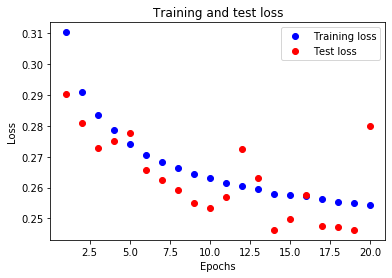

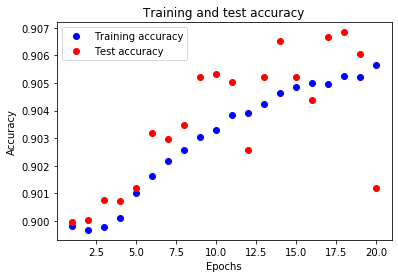

In [5]:
# set up the layers
model = models.Sequential()
model.add(layers.Conv2D(8, kernel_size=(20, 20), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Dropout(0.75))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Overfitting is when the model performs poorly on the new data because it picked up on the training data too well. The concepts learned during the training applies to the training data but does not translate to the new data introduced.

One reason a model can become overfit is if it runs for too long. As the model runs for an increased amount of time, it learns details that aren't important since it applies to only the training data.

An example of an overfitted model can be found below.

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 199us/step - loss: 0.2571 - acc: 0.9058 - val_loss: 0.2391 - val_acc: 0.9089
Epoch 2/20
50000/50000 [==============================] - 10s 190us/step - loss: 0.2211 - acc: 0.9146 - val_loss: 0.2139 - val_acc: 0.9180
Epoch 3/20
50000/50000 [==============================] - 10s 190us/step - loss: 0.2044 - acc: 0.9206 - val_loss: 0.1970 - val_acc: 0.9232
Epoch 4/20
50000/50000 [==============================] - 10s 191us/step - loss: 0.1920 - acc: 0.9255 - val_loss: 0.1907 - val_acc: 0.9255
Epoch 5/20
50000/50000 [==============================] - 9s 189us/step - loss: 0.1820 - acc: 0.9290 - val_loss: 0.1842 - val_acc: 0.9286
Epoch 6/20
50000/50000 [==============================] - 10s 193us/step - loss: 0.1738 - acc: 0.9325 - val_loss: 0.1817 - val_acc: 0.9291
Epoch 7/20
50000/50000 [==============================] - 10s 191us/step - loss: 0.1666 - acc: 0.9353 - val_loss: 0.1

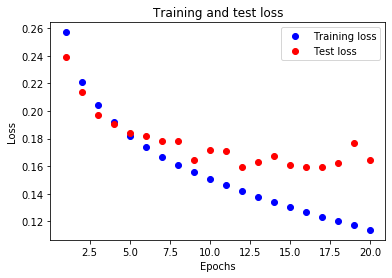

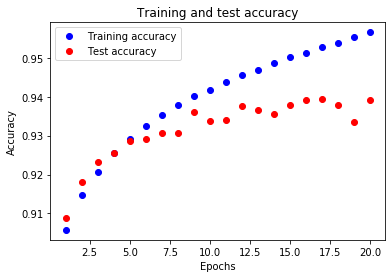

In [6]:
# set up the layers
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The spot between underfit and overfit is the preferred result. Normally that spot is when the model performs well on both the training and test data.

# Finetuning a Pretrained Model

When you are training your network, you can use a network that is already trained and fine tune it since training a network from scratch can result in some issues. Some issues from training a new network is a lot of data is required and a lot of computing power is needed for the large amount of data.

You can load a different model that is made up of the fully connected layers.

A code example can be found below.

In [0]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

If you load another model into yours, you have to create a classifier for the new model.

After classifying the new model, you have to combine it with the original model.

If you want to, you can freeze the weights of any layer you want to. Freezing the layer causes it to not be trained if you don't want it to by setting the parameter to false.

A code example of freezing some layers can be found below.

In [0]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False